# Building an anomaly detection systems using Fourier Transformation
### IBM IOT-DeepLearning Series Tutorial

source : https://developer.ibm.com/tutorials/iot-deep-learning-anomaly-detection-5/

In [2]:
import pip

try:
    __import__('keras')
except ImportError:
    pip.main(['install', 'keras'])

try:
    __import__('h5py')
except ImportError:
    pip.main(['install', 'h5py'])

try:
    __import__('ibmiotf')
except ImportError:
    pip.main(['install','ibmiotf'])

### Importing dependencies

In [92]:

import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from  sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ibmiotf.application
#from Queue import Queue
%matplotlib inline

### Download data from url using 
- `wget <url>` command if using linux machine
- `curl -O <url>` if using mac

In [16]:
# run in command line prompt
#wget https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.healthy.phase_aligned.pickle
#wget https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.broken.phase_aligned.pickle

In [26]:
data_healthy = pickle.load(open('watsoniotp.healthy.phase_aligned.pickle', 'rb'), encoding='latin1')
data_broken = pickle.load(open('watsoniotp.broken.phase_aligned.pickle', 'rb'), encoding='latin1')

In [28]:
data_healthy

(array([[ 2.08      ,  3.37536   ,  3.97083266],
        [ 2.1836288 ,  3.76812337,  3.95194702],
        [ 2.31038837,  4.18246112,  3.9449437 ],
        ...,
        [ 4.67227426,  8.55622075, 11.7405177 ],
        [ 4.98298998,  9.13593768, 11.85424761],
        [ 5.31522579,  9.74939673, 12.01591895]]),
 array([[  2.24      ,   5.19808   ,   3.79448293],
        [  2.9499392 ,   8.08768515,   3.70202697],
        [  4.18299823,  12.18248928,   3.83328361],
        ...,
        [-18.03779251, -35.93626869,  79.32047136],
        [-22.33342679, -44.34622405,  81.32110135],
        [-27.61649814, -54.304316  ,  87.24668612]]))

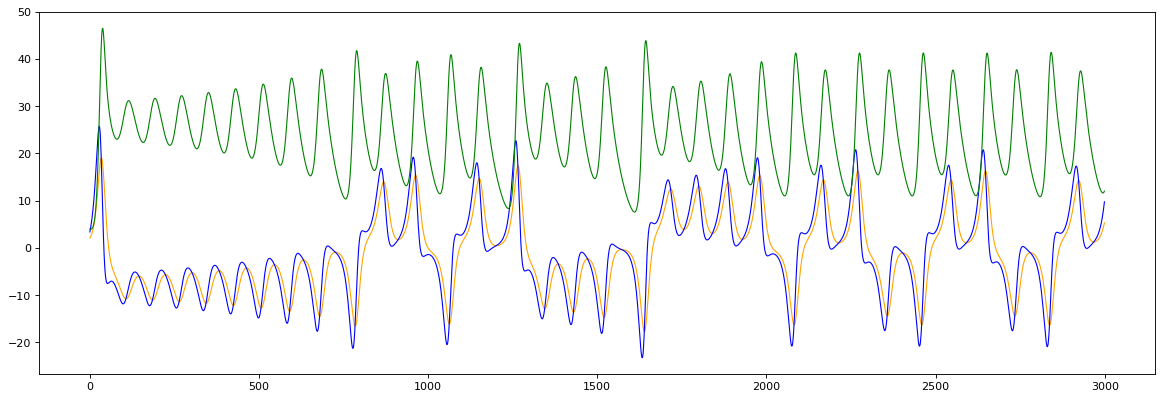

In [30]:
fig, ax = plt.subplots(num=None, figsize=(18,6), dpi=80, facecolor='w', edgecolor = 'k')
size = len(data_healthy)


ax.plot(range(0,size), data_healthy[:,0], '-', color = 'orange', animated=True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,1], '-', color = 'blue', animated=True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,2], '-', color = 'green', animated=True, linewidth=1)

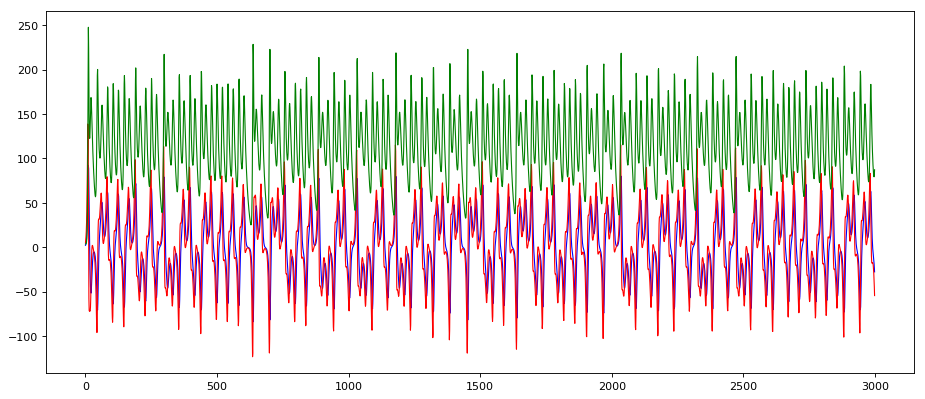

In [32]:
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor = 'k')
size = len(data_broken)


ax.plot(range(0,size), data_broken[:,0], '-', color = 'blue', animated=True, linewidth=1)
ax.plot(range(0,size), data_broken[:,1], '-', color = 'red', animated=True, linewidth=1)
ax.plot(range(0,size), data_broken[:,2], '-', color = 'green', animated=True, linewidth=1)

### Applying the Fast Fourier Transform on signals
- sine component returns real part
- cosine component returns imaginary part

In [39]:
data_healthy_fft = np.fft.fft(data_healthy)
data_healthy_fft

array([[ 9.42619266+0.j        , -1.59309633+0.51569445j,
        -1.59309633-0.51569445j],
       [ 9.9036992 +0.j        , -1.6764064 +0.15919595j,
        -1.6764064 -0.15919595j],
       [10.43779318+0.j        , -1.75331404-0.20569613j,
        -1.75331404+0.20569613j],
       ...,
       [24.9690127 +0.j        , -5.47609496+2.75768205j,
        -5.47609496-2.75768205j],
       [25.97317526+0.j        , -5.51210266+2.35412545j,
        -5.51210266-2.35412545j],
       [27.08054148+0.j        , -5.56743205+1.96286582j,
        -5.56743205-1.96286582j]])

In [41]:
data_broken_fft = np.fft.fft(data_broken)
data_broken_fft

array([[ 11.23256293  +0.j        ,  -2.25628146  -1.21555072j,
         -2.25628146  +1.21555072j],
       [ 14.73965132  +0.j        ,  -2.94491686  -3.7980914j ,
         -2.94491686  +3.7980914j ],
       [ 20.19877111  +0.j        ,  -3.82488821  -7.23062421j,
         -3.82488821  +7.23062421j],
       ...,
       [ 25.34641016  +0.j        , -39.72989385 +99.81526484j,
        -39.72989385 -99.81526484j],
       [ 14.64145051  +0.j        , -40.82086544+108.83109623j,
        -40.82086544-108.83109623j],
       [  5.32587198  +0.j        , -44.0876832 +122.58676377j,
        -44.0876832 -122.58676377j]])

### Plotting the imaginary and real part of waves
- x-axis (wave1)

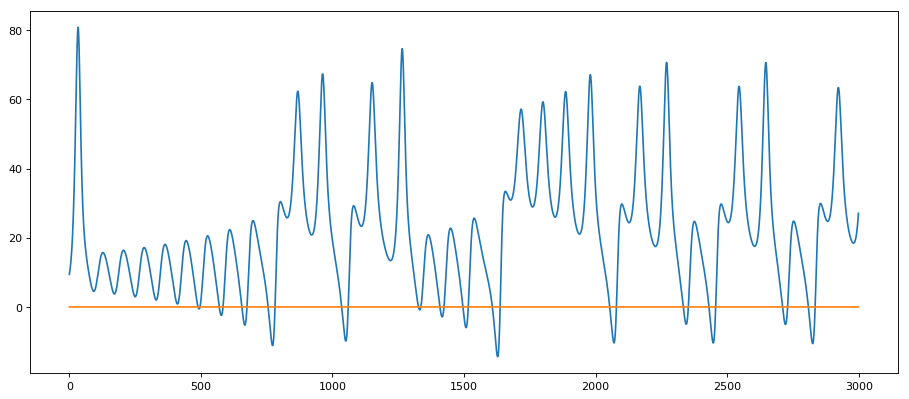

In [46]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)

ax.plot(range(0,size), data_healthy_fft[:,0].real)
ax.plot(range(0,size), data_healthy_fft[:,0].imag)


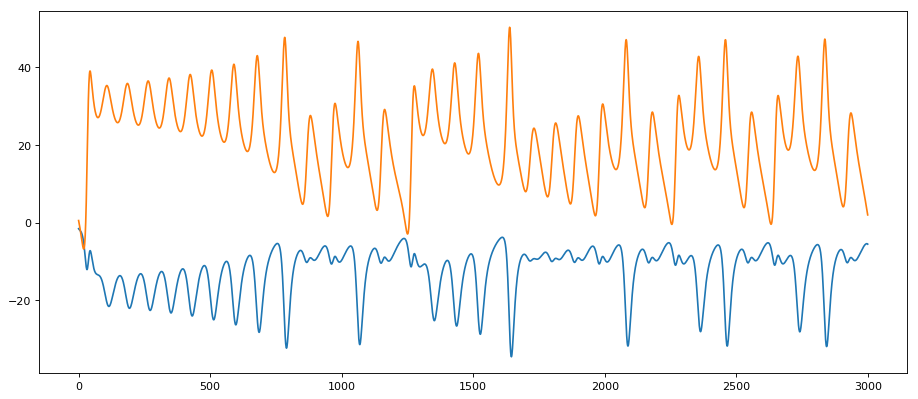

In [47]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)

ax.plot(range(0,size), data_healthy_fft[:,1].real)
ax.plot(range(0,size), data_healthy_fft[:,1].imag)

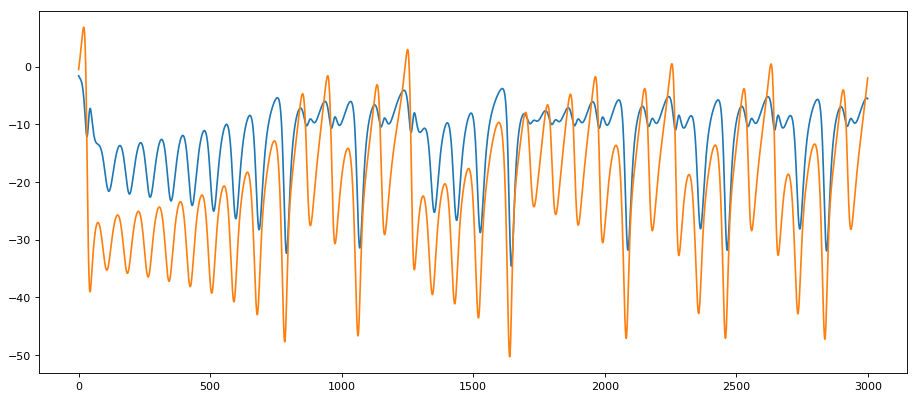

In [48]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)

ax.plot(range(0,size), data_healthy_fft[:,2].real)
ax.plot(range(0,size), data_healthy_fft[:,2].imag)

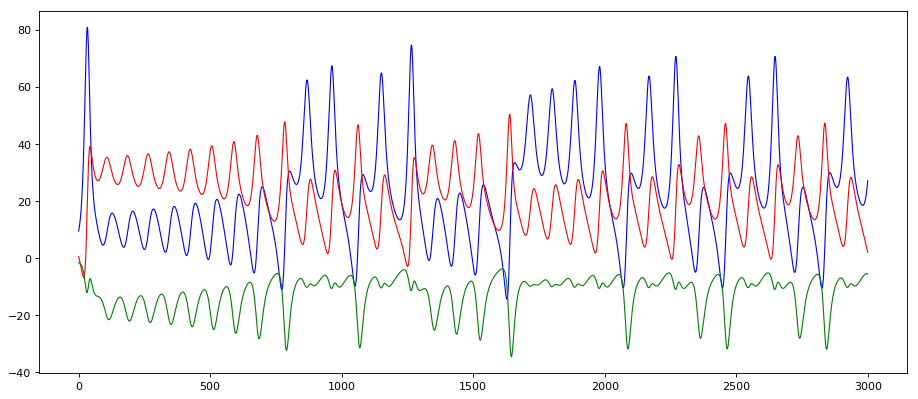

In [50]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)

ax.plot(range(0,size), data_healthy_fft[:,0].real, color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,1].imag, color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,2].real, color='green', animated = True, linewidth=1)

### Comparing it with broken data

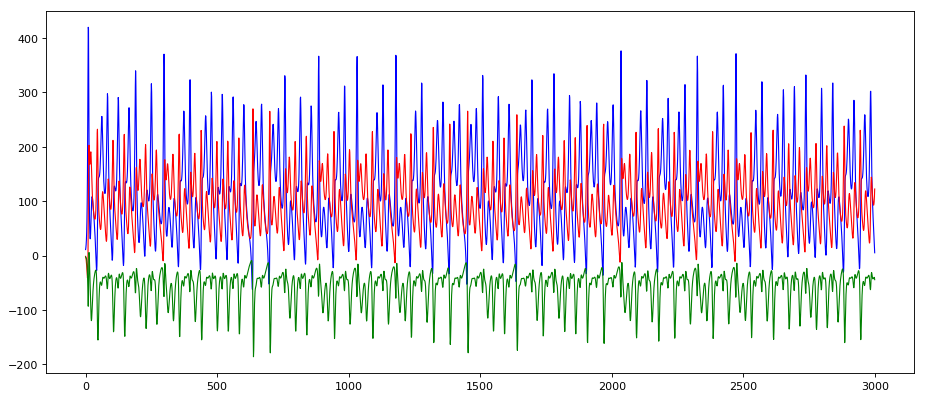

In [52]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)

ax.plot(range(0,size), data_broken_fft[:,0].real,  color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,1].imag,  color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,2].real,  color='green', animated = True, linewidth=1)

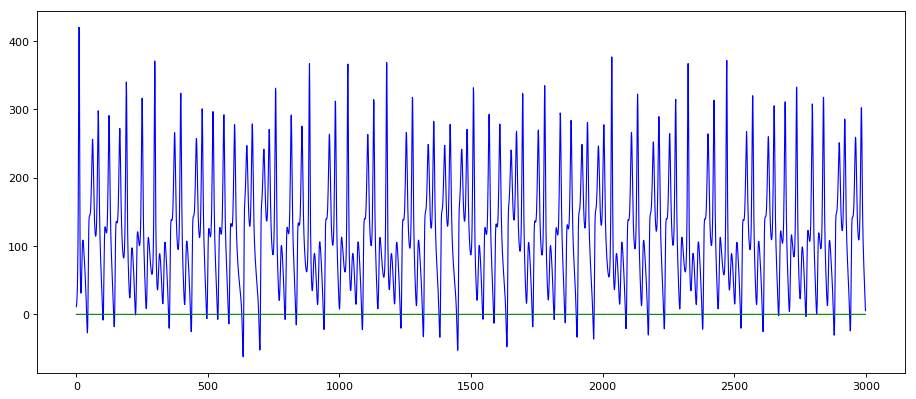

In [61]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)

ax.plot(range(0,size), data_broken_fft[:,0].real,  color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,0].imag,  color='green', animated = True, linewidth=1)

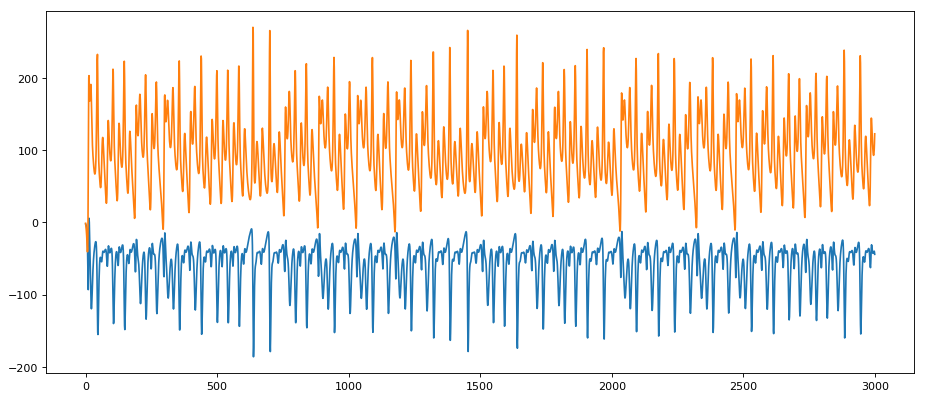

In [59]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)

ax.plot(range(0,size), data_broken_fft[:,1].real)
ax.plot(range(0,size), data_broken_fft[:,1].imag)

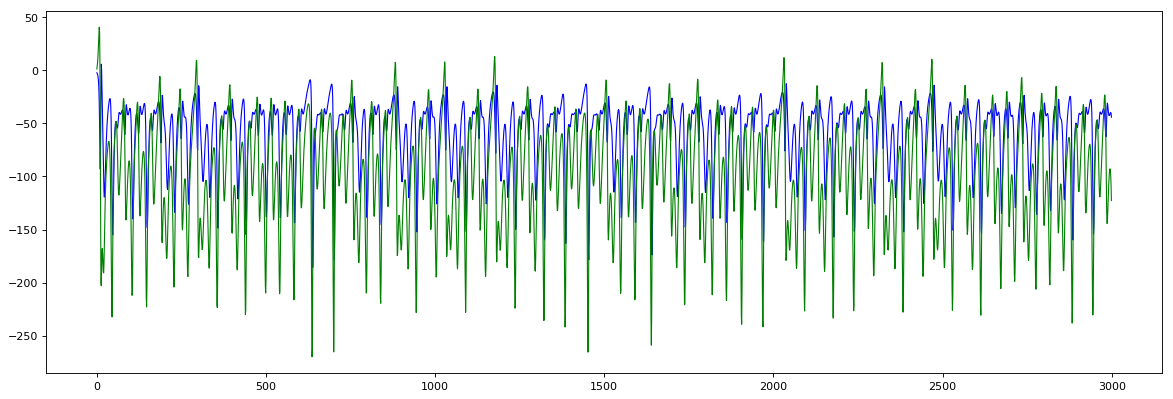

In [64]:
fig, ax = plt.subplots(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)


ax.plot(range(0,size), data_broken_fft[:,2].real,  color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,2].imag,  color='green', animated = True, linewidth=1)

Clearly, broken data has much higher frequencies

## Detecting Anomalous behaviour using Machine Learning 
- We will be using **unsupervised machine learning** techniques because we do not know which part of signal is **anomalous**

- A simple approach to unsupervised machine learning is to feed those 3,000 frequency bands into an ordinary feed-forward neural network. Remember, DFT (discrete Fourier transform) returns as many frequency bands as we have samples in the signal, and because we are sampling with 100 Hz for 30 seconds from the physical model this is also the number of frequency bands.

- With this approach we have transformed our three-dimensional input data (the three accelerometer axes we are measuring) into a 9,000 dimensional data set (the 3,000 frequency bands per accelerometer axis). This is our new 9,000 dimensional input feature space. We can use the 9,000 dimensional input space to train a feed-forward neural network. Our hidden layer in the feed-forward neural network has only 100 neurons (instead of the 9,000 we have in the input and output layer). This is called a bottleneck and turns our neural network into an autoencoder.

In [77]:
def scaleData(data):
    #normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

In [79]:
scaled_healthy_data = scaleData(data_healthy)
scaled_healthy_data

array([[5.38034322e-01, 5.43479947e-01, 6.08963828e-04],
       [5.40855744e-01, 5.51500974e-01, 1.64733249e-04],
       [5.44306929e-01, 5.59962593e-01, 0.00000000e+00],
       ...,
       [6.08612179e-01, 6.49283655e-01, 1.83368596e-01],
       [6.17071797e-01, 6.61122653e-01, 1.86043767e-01],
       [6.26117326e-01, 6.73650734e-01, 1.89846623e-01]])

In [109]:
scaled_broken_data = scaleData(data_broken)
scaled_broken_data.shape

(3000, 3)

In [83]:
scaleData(data_broken_fft.real)

array([[0.15198831, 0.95790869, 0.95790869],
       [0.15926736, 0.95431429, 0.95431429],
       [0.1705979 , 0.94972119, 0.94972119],
       ...,
       [0.18128196, 0.76231153, 0.76231153],
       [0.15906354, 0.75661709, 0.75661709],
       [0.13972883, 0.73956562, 0.73956562]])

- Building an LSTM model for time series data

source: http://cs229.stanford.edu/proj2012/BussetiOsbandWong-DeepLearningForTimeSeriesModeling.pdf

In [89]:
timesteps = 3
dim = 3
samples = 3000
data_healthy_rescaled = scaled_healthy_data
data_healthy_rescaled.shape = (samples//timesteps, timesteps, dim)

In [90]:
data_healthy_rescaled.shape

(1000, 3, 3)

### Defining logging parameters

In [155]:
losses = []

def handleLoss(loss):
        global losses
        losses+=[loss]
        print(losses)

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    
    def on_batch_end(self, batch, logs={}):
        self.losses.append('loss')
        handleLoss(logs.get('loss'))

### Designing the network 
- First trial - network : [1,2]

In [156]:
#design network

model = Sequential()
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(LSTM(50,input_shape=(10,3),return_sequences=True))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

In [157]:
def train(data):
    data.shape = (300, 10, 3)
    model.fit(data, data, 
              epochs=50,
              batch_size=72,
              validation_data=(data, data),
              verbose=0,
              shuffle=False,
              callbacks=[LossHistory()])
    
    data.shape = (3000, 3)

def score(data):
    data.shape = (300, 10, 3)
    yhat =  model.predict(data)
    yhat.shape = (3000, 3)
    return yhat

In [ ]:
for i in range(20):
    print('__________________________________')
    train(scaled_healthy_data)
    yhat_healthy = score(scaled_healthy_data)
    yhat_broken = score(scaled_broken_data)
    scaled_broken_data.shape = (3000,3)
    scaled_broken_data.shape  = (3000,3)

print("‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑")
train(scaled_healthy_data)
yhat_healthy = score(scaled_healthy_data)
yhat_broken = score(scaled_broken_data)
scaled_healthy_data.shape = (3000, 3)
scaled_healthy_data.shape = (3000, 3)

__________________________________


Exception ignored in: <bound method TF_Output.<lambda> of <tensorflow.python.pywrap_tensorflow_internal.TF_Output; proxy of <Swig Object of type 'TF_Output *' at 0x1a3d987270> >>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 963, in <lambda>
    __del__ = lambda self: None
KeyboardInterrupt


[0.3888909]
[0.3888909, 0.4656673]
[0.3888909, 0.4656673, 0.4800201]
[0.3888909, 0.4656673, 0.4800201, 0.44810623]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328, 0.42363787]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328, 0.42363787, 0.43146664]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328, 0.42363787, 0.43146664, 0.39171922]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328, 0.42363787, 0.43146664, 0.39171922, 0.45418334]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328, 0.42363787, 0.43146664, 0.39171922, 0.45418334, 0.2750649]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328, 0.42363787, 0.43146664, 0.39171922, 0.45418334, 0.2750649, 0.33778235]
[0.3888909, 0.4656673, 0.4800201, 0.44810623, 0.5216491, 0.35165328, 0.42363787, 0.43146664, 0.

In [147]:
data_healthy_rescaled.shape

(3000, 3)

NameError: name 'loss' is not defined

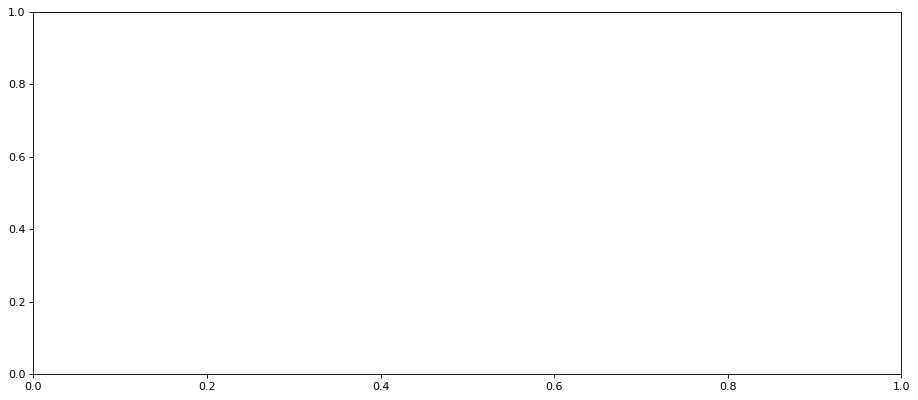

In [154]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(scaled_healthy_data)
#ax.set_ylim(0,energy.max())
ax.plot(loss, color='blue', animated = True, linewidth=1)

In [152]:
losses

array([], dtype=float64)